In [1]:
from db import databaseconnection as dbc
from db import databaseconnectionDEPRECATED as dbd
import numpy as np
from ga import networkedgeneticalgorithm as nga
from membranesimulation import MembraneSimulation
import nanoparticle
from nanoparticle import Ligand, NanoParticle
import math
import parlammps
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import networkx
from tools import vectools
import os
import tools
import copy
import random
import pprint
import time
import pandas as pd
import holoviews as hv
import seaborn as sns
import pygraphviz
from pythreejs import *
from IPython.display import display
from ipywidgets import HTML, Text, Output, VBox
from traitlets import link, dlink
import k3d
from tools import analysistools as atools


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
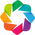

In [8]:
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.style.use('seaborn-deep')
pp = pprint.PrettyPrinter(indent=4)
hv.extension('bokeh','matplotlib')
%output widgets='live' holomap='scrubber'
%opts GridSpace [shared_xaxis=True shared_yaxis=True]
fAll = []
hsv = plt.get_cmap('hsv')
cool = plt.get_cmap('cool')
dbParentPath = '/Users/joel/Projects/optidb/thomas'
dbPaths = ['eps4-tl34/db/datastore.db','eps10-tl28/db/datastore.db','eps12-tl24/db/datastore.db']
fitnessLimit = 0

In [3]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return matplotlib.colors.LinearSegmentedColormap.from_list(cmap_name, color_list, N)

In [4]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [5]:
def plotTuples(tS,title="Graph",xlabel="x",ylabel="y",alpha=1.0,polyfit=True,polyNum=1,ms=15,label=None,color=None):
    if len(tS)>0:
        x = [float(k[0]) for k in tS]
        y = [float(k[1]) for k in tS]
        if color.all() != None:
            plt.plot(x,y,'.',alpha=alpha,ms=ms,label=label,color=color)
        else:
            plt.plot(x,y,'.',alpha=alpha,ms=ms,label=label)
        axes = plt.gca()
        if polyfit:
            if color.all() != None:
                plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, polyNum))(np.unique(x)),color=color)
            else:
                plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, polyNum))(np.unique(x)))

In [6]:
def makeTuplePlot(tS,title="Graph",xlabel="x",ylabel="y",alpha=1.0,polyfit=True,polyNum=1,ms=15):
    if len(tS)>0:
        x = [float(k[0]) for k in tS]
        y = [float(k[1]) for k in tS]
        plt.plot(x,y,'.',alpha=alpha,ms=ms)
        axes = plt.gca()
        if polyfit:
            plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, polyNum))(np.unique(x)))
        plt.xlabel(xlabel,fontsize=16)
        plt.ylabel(ylabel,fontsize=16)
        plt.title(title,fontsize=18)
        plt.show()

In [9]:
conns = []
individualsByDB = []
individuals = []

for p in log_progress(dbPaths):
    path = os.path.join(dbParentPath,p)
    print path
    conns.append(dbc.DatabaseConnection(path))
    session = conns[-1].getLastSession()
    individualsByDB.append(session.getIndividualsList())
    for i in individualsByDB[-1]:
        individuals.append(i)

/Users/joel/Projects/optidb/thomas/eps4-tl34/db/datastore.db


/anaconda2/lib/python2.7/site-packages/sqlalchemy/sql/sqltypes.py:603: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


/Users/joel/Projects/optidb/thomas/eps10-tl28/db/datastore.db
/Users/joel/Projects/optidb/thomas/eps12-tl24/db/datastore.db


In [10]:
print len(individuals)

9440


In [11]:
ffByFitness = []
ffByBudtime = []
for i in log_progress(individuals):
    ff = atools.formFactor(i.phenomePickle.particle.ligands)
    ffByFitness.append((float(i.fitness),ff))
    ffByBudtime.append((float(i.budTime),ff))

In [12]:
networks = atools.buildNetworkList(individuals)

In [13]:
pNetworks = atools.pruneNetworkList(networks,0.5)

In [14]:
budIndividuals = []
noBudIndividuals = []

for i in log_progress(individuals):
    if i.budTime != -1:
        budIndividuals.append(i)
    else:
        noBudIndividuals.append(i)
        
print "Budded: " + str(len(budIndividuals))
print "Did Not Bud: " + str(len(noBudIndividuals))

Budded: 5707
Did Not Bud: 3733


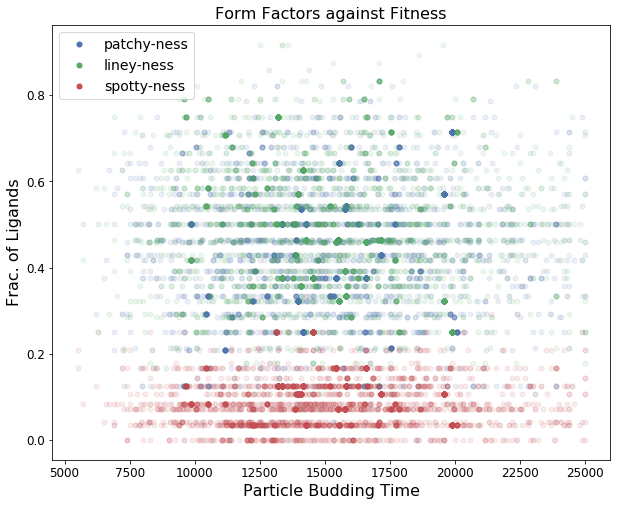

In [15]:
ffBudded = []

for i in ffByBudtime:
    if i[0] > 0:
        ffBudded.append(i)
        
for i in range(len(ffBudded)):
    ffBudded[i] = (float(ffBudded[i][0]),ffBudded[i][1])
    
cScoreBud = []
cBX = []
cBY = []
lBX = []
lBY = []
pBX = []
pBY = []

for i in ffBudded:
    cScore = float(i[1][0]) - float(i[1][1])
    cScoreBud.append((float(i[0]),(cScore)))
    cBX.append(float(i[0]))
    cBY.append(cScore)
    lBX.append(float(i[0]))
    lBY.append(float(i[1][1]))
    pBX.append(float(i[0]))
    pBY.append(float(i[1][0]))
    
    
cScoreBud= sorted(cScoreBud)


plt.plot([i[0] for i in ffBudded],[i[1][0] for i in ffBudded],'.',label='patchy-ness',ms=10,alpha=0.1)
plt.plot([i[0] for i in ffBudded],[i[1][1] for i in ffBudded],'.',label='liney-ness',ms=10,alpha=0.1)
plt.plot([i[0] for i in ffBudded],[i[1][2] for i in ffBudded],'.',label='spotty-ness',ms=10,alpha=0.1)
plt.xlabel('Particle Budding Time',fontsize=16)
plt.ylabel('Frac. of Ligands',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
axes = plt.gca()
plt.title('Form Factors against Fitness',fontsize=16)
leg = plt.legend(fontsize=14)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1.0)

In [16]:
hottr = atools.transparent_cmap(plt.cm.Reds)
cooltr = atools.transparent_cmap(plt.cm.Blues)

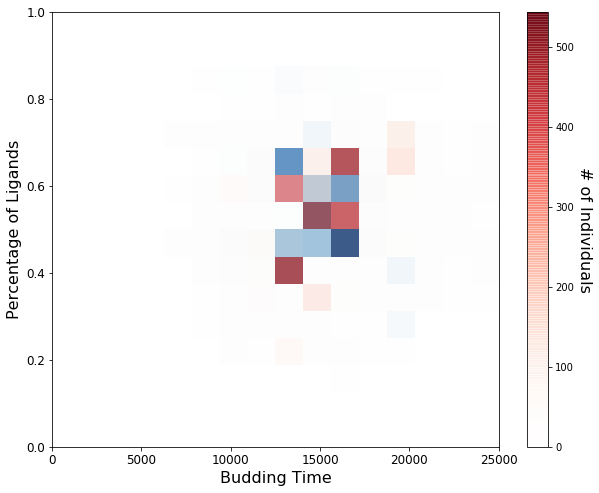

In [17]:



fig, ax = plt.subplots()

h, xedges, yedges = np.histogram2d(lBX, lBY, bins=16, range=[[0, 25000], [0.0, 1.0]])
h2, xedges2, yedges2 = np.histogram2d(pBX, pBY, bins=16, range=[[0, 25000], [0.0, 1.0]])
df = pd.DataFrame((h))
df2 = pd.DataFrame((h2))

extent = [xedges[0], xedges[-1], 0.0,1.0]

im = ax.imshow(df.T.values,extent=extent, aspect="auto",cmap=hottr)
im2 = ax.imshow(df2.T.values,extent=extent, aspect="auto",cmap=cooltr)
plt.xlabel('Budding Time',fontsize=16)
plt.ylabel('Percentage of Ligands',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cbar = fig.colorbar(im)
cbar.set_label('# of Individuals', rotation=270,fontsize=16,labelpad=18)
plt.show()

/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda2/lib/python2.7/site-packages/seaborn/distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / 

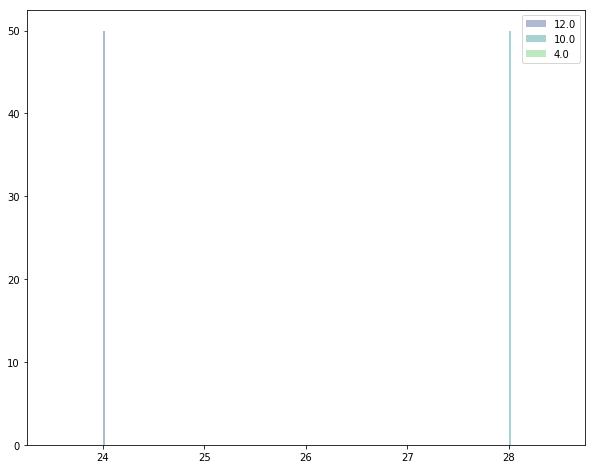

In [18]:

lengths = {}
lF = {}
eF = {}
for n in log_progress(pNetworks):
    G = n[0]
    i = n[1]
    
    avgEps = 0.0
    nL = 0
    
    for l in i.phenomePickle.particle.ligands:
        if l.eps > 0:
            avgEps += l.eps
            nL+=1
    avgEps/=float(nL)
    if avgEps not in lengths:
        lengths[avgEps] = []
    if avgEps not in lF:
        lF[avgEps] = []
    if avgEps not in eF:
        eF[avgEps] = []
    if i.budTime > 0:
        lF[avgEps].append((len(G.nodes),i.budTime))
        lengths[avgEps].append(len(G.nodes))

    
sns.set_palette("viridis",len(lengths))
i = 0
for key, value in lengths.iteritems():
    sns.distplot(value,kde=True,label=str(key))
    i+=1

leg = plt.legend()

plt.show()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


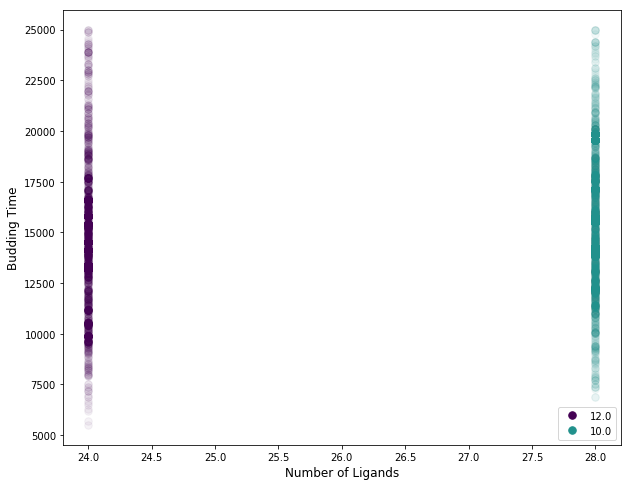

In [19]:
colors = plt.cm.viridis(np.linspace(0, 1.0, len(lF)))

i=0
for key, value in lF.iteritems():
    plotTuples(value,polyNum=1,alpha=0.05,label=key,color=colors[i])
    i+=1
leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1.0)
plt.xlabel("Number of Ligands",fontsize=12)
plt.ylabel("Budding Time",fontsize=12)
plt.show()

In [27]:
individualsByDB = []

In [20]:
diameters = {}
for pN in log_progress(pNetworks):
    G = pN[0]
    i = pN[1]
    avgEps = 0.0
    nL = 0
    graphs = list(networkx.connected_component_subgraphs(G))
    for l in i.phenomePickle.particle.ligands:
        if l.eps > 0:
            avgEps += l.eps
            nL+=1
    avgEps/=float(nL)
    dS = []
    for g in graphs:
        d = networkx.diameter(g)
        dS.append(d)
    if not avgEps in diameters:
        diameters[avgEps] = []
    diameters[avgEps].append((dS,i.fitness,i.budTime,avgEps))

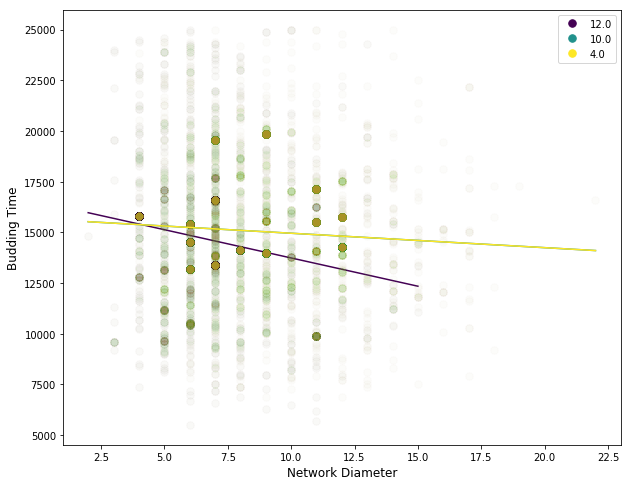

In [21]:
tD = []
colors = plt.cm.viridis(np.linspace(0, 1.0, len(diameters)))

i=0
for key, value in diameters.iteritems():
    for d in value:
        if float(d[2])>0:
            tD.append((float(np.max(d[0])),float(d[2])))
    plotTuples(tD,polyNum=1,alpha=0.01,label=key,color=colors[i])
    i+=1
leg = plt.legend()
leg.title = "Ligand Strength (kT)"
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1.0)
plt.xlabel("Network Diameter",fontsize=12)
plt.ylabel("Budding Time",fontsize=12)
plt.show()


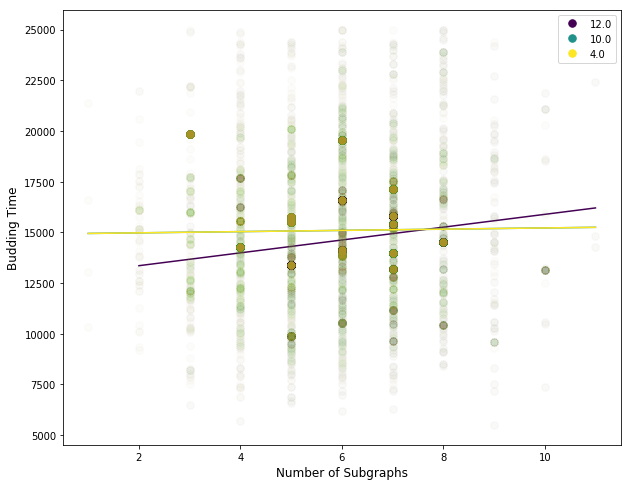

In [22]:
tS = []
colors = plt.cm.viridis(np.linspace(0, 1.0, len(diameters)))

i=0
for key, value in diameters.iteritems():
    for d in value:
        if float(d[2])>0:
            tS.append((len(d[0]),float(d[2])))
    plotTuples(tS,polyNum=1,alpha=0.01,label=key,color=colors[i])
    i+=1
leg = plt.legend()
leg.title = "Ligand Strength (kT)"
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1.0)
plt.xlabel("Number of Subgraphs",fontsize=12)
plt.ylabel("Budding Time",fontsize=12)
plt.show()

In [36]:
hmSG = []
hmDI = []

absMinSg = 1e8
absMaxSg = 0
absMinDi = 1e8
absMaxDi = 0
minEps = 1e8
maxEps = 0
vals = {}
vald = {}
for key, value in diameters.iteritems():
    minSg = 1e8
    maxSg = 0
    minDi = 1e8
    maxDi = 0
    if key < minEps:
        minEps = key
    if key > maxEps:
        maxEps = key
    if not key in vals:
        vals[key]={}
    if not key in vald:
        vald[key]={}
    for d in value:
        sg = len(d[0])
        di = max(d[0])
        if sg>maxSg:
            maxSg = sg
        if sg<minSg:
            minSg = sg
        if di>maxDi:
            maxDi = di
        if di<minDi:
            minDi = di
        if not sg in vals[key]:
            vals[key][sg] = []
        if not di in vald[key]:
            vald[key][di] = []
        if float(d[2])>0:
            vals[key][sg].append(float(d[2]))
            vald[key][di].append(float(d[2]))
    if minSg < absMinSg:
        absMinSg = minSg
    if maxSg > absMaxSg:
        absMaxSg = maxSg
    if minDi < absMinDi:
        absMinDi = minDi
    if maxDi > absMaxDi:
        absMaxDi = maxDi
        
for eps in range(int(minEps),int(maxEps)+1):
    hmSG.append([])
    for i in range(absMinSg,absMaxSg+1):
        if eps in vals:
            sgs = vals[eps]
            if i in sgs:
                hmSG[-1].append(np.mean(sgs[i]))
            else:
                hmSG[-1].append(np.nan)
        else:
            hmSG[-1].append(np.nan)

for eps in range(int(minEps),int(maxEps)+1):
    hmDI.append([])
    for i in range(absMinDi,absMaxDi+1):
        if eps in vald:
            dis = vald[eps]
            if i in dis:
                hmDI[-1].append(np.mean(dis[i]))
            else:
                hmDI[-1].append(np.nan)
        else:
                hmDI[-1].append(np.nan)
            

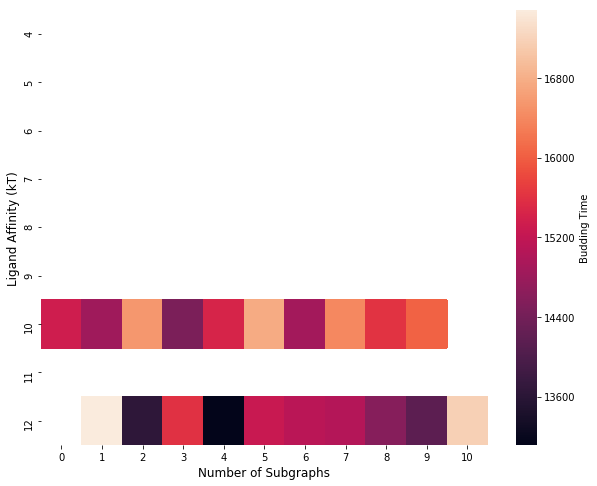

In [34]:
df = pd.DataFrame(hmSG,index=range(int(minEps),int(maxEps)+1))
ax = sns.heatmap(df,cbar_kws={'label': 'Budding Time'})
plt.xlabel("Number of Subgraphs",fontsize=12)
plt.ylabel("Ligand Affinity (kT)",fontsize=12)
plt.show()

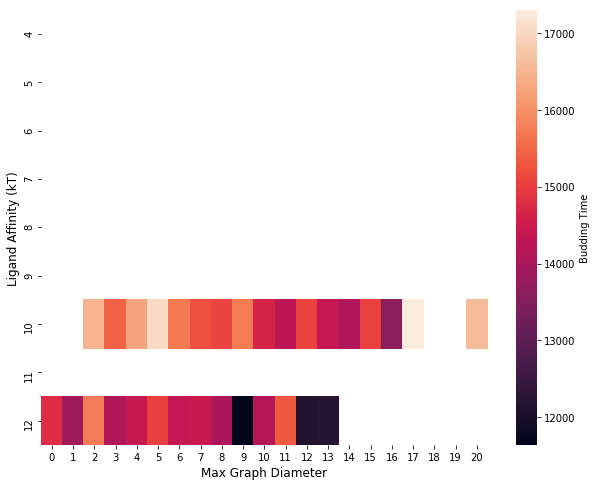

In [35]:
df = pd.DataFrame(hmDI,index=range(int(minEps),int(maxEps)+1))
ax = sns.heatmap(df,cbar_kws={'label': 'Budding Time'})
plt.xlabel("Max Graph Diameter",fontsize=12)
plt.ylabel("Ligand Affinity (kT)",fontsize=12)
plt.show()